The pandas library
---

The pandas library is an open-source Python library that provides high-performance data structures and data analysis tools. It provides two main data structures:

- DataFrames
- Series

You will spend most of your time in this program working with DataFrames. But DataFrames and Series are closely related, so you'll take a brief look at Series as well.

## Series

A pandas *Series* can be thought of as a single column in a spreadsheet. It is a one-dimensional array of values.
[documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

## DataFrames

If a Series is a single column in a spreadsheet, then the DataFrame is an entire spreadsheet. It is a two-dimensional structure with labeled axes.

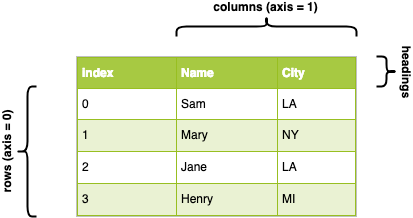
 

There are a number of ways to create a DataFrame. Most commonly, the data is read from some source, such as a file or a database. Then the DataFrame is constructed from that data. Next, you're going to explore the four most common ways to create DataFrames:

   * From a CSV file, using `read_csv()`
   * From in-memory lists
   * From JSON data, using `read_json()`
   * From a database, using `read_sql_query()` or `read_sql_table()`
   
  
  ### From CSV

In [1]:
import pandas as pd
#return a view intead of object creation, savin memory for pandas 2.0
#pd.set_option("mode.copy_on_write", True)

df1 = pd.read_csv("players.csv")
df2 = pd.read_csv("vehicles.csv")

In [2]:
pd.__version__

'1.4.4'

### From Database
In this case you need more infomration to access the file.

In [3]:
# Install the necessary PostgreSQL database adapter for Python
#!pip install psycopg2-binary

# Database credentials
#postgres_user = 'user_name'
#postgres_pw = '*********'
#postgres_host = '142.93.121.114'
#postgres_port = '5432'
#postgres_db = 'name_database'

# Use a database table to create a DataFrame
#df3 = pd.read_sql_table('name_database', 'postgresql://{}:{}@{}:{}/{}'.format(
#    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))



# To Do:
- Aggregate a column (max, min, sum, etc)
  - Reshape:
    - Sort
    - Drop columns
    - `melt()` and `pivot()`
  - Select rows, using the following:
    - Logical criteria
    - `head()` and `tail()`
    - `iloc`
  - Select columns
  - Handle missing data with `dropna()` and `fillna()`
  - Make new columns
  - Combine datasets with `merge()`
  - Group data
    

In [4]:
df1.head()

,Unnamed: 0,playerid,birthyear,birthcountry,deathyear,namefirst,namelast,weight,height,bats,throws,yearid,teamid,lgid,salary
0,0,barkele01,1955,USA,NaN,Len,Barker,225,77,R,R,1985,ATL,NL,870000
1,1,bedrost01,1957,USA,NaN,Steve,Bedrosian,200,75,R,R,1985,ATL,NL,550000
2,2,benedbr01,1955,USA,NaN,Bruce,Benedict,175,73,R,R,1985,ATL,NL,545000
3,3,campri01,1953,USA,2013.0,Rick,Camp,195,73,R,R,1985,ATL,NL,633333
4,4,ceronri01,1954,USA,NaN,Rick,Cerone,192,71,R,R,1985,ATL,NL,625000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    26428 non-null  int64  
 1   playerid      26428 non-null  object 
 2   birthyear     26428 non-null  int64  
 3   birthcountry  26428 non-null  object 
 4   deathyear     492 non-null    float64
 5   namefirst     26428 non-null  object 
 6   namelast      26428 non-null  object 
 7   weight        26428 non-null  int64  
 8   height        26428 non-null  int64  
 9   bats          26428 non-null  object 
 10  throws        26428 non-null  object 
 11  yearid        26428 non-null  int64  
 12  teamid        26428 non-null  object 
 13  lgid          26428 non-null  object 
 14  salary        26428 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 3.0+ MB


In [6]:
df1.shape

(26428, 15)

In [7]:
df1.describe()

,Unnamed: 0,birthyear,deathyear,weight,height,yearid,salary
count,26428.000000,26428.000000,492.000000,26428.000000,26428.000000,26428.000000,2.642800e+04
mean,13213.500000,1971.389133,2008.833333,199.022136,73.509006,2000.878727,2.085634e+06
std,7629.250793,9.679736,7.188803,22.631696,2.284665,8.909314,3.455348e+06
min,0.000000,1925.000000,1989.000000,140.000000,66.000000,1985.000000,0.000000e+00
25%,6606.750000,1964.000000,2006.000000,185.000000,72.000000,1994.000000,2.947020e+05
50%,13213.500000,1971.000000,2011.000000,195.000000,74.000000,2001.000000,5.500000e+05
75%,19820.250000,1979.000000,2015.000000,215.000000,75.000000,2009.000000,2.350000e+06
max,26427.000000,1995.000000,2018.000000,315.000000,83.000000,2016.000000,3.300000e+07


In [8]:
## Lots of missing values here are not really missing
df1.isna().head()

,Unnamed: 0,playerid,birthyear,birthcountry,deathyear,namefirst,namelast,weight,height,bats,throws,yearid,teamid,lgid,salary
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [9]:
df1.fillna('not_determinated')

,Unnamed: 0,playerid,birthyear,birthcountry,deathyear,namefirst,namelast,weight,height,bats,throws,yearid,teamid,lgid,salary
0,0,barkele01,1955,USA,not_determinated,Len,Barker,225,77,R,R,1985,ATL,NL,870000
1,1,bedrost01,1957,USA,not_determinated,Steve,Bedrosian,200,75,R,R,1985,ATL,NL,550000
2,2,benedbr01,1955,USA,not_determinated,Bruce,Benedict,175,73,R,R,1985,ATL,NL,545000
3,3,campri01,1953,USA,2013.0,Rick,Camp,195,73,R,R,1985,ATL,NL,633333
4,4,ceronri01,1954,USA,not_determinated,Rick,Cerone,192,71,R,R,1985,ATL,NL,625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26423,26423,strasst01,1988,USA,not_determinated,Stephen,Strasburg,235,76,R,R,2016,WAS,NL,10400000
26424,26424,taylomi02,1991,USA,not_determinated,Michael,Taylor,210,75,R,R,2016,WAS,NL,524000
26425,26425,treinbl01,1988,USA,not_determinated,Blake,Treinen,225,77,R,R,2016,WAS,NL,524900
26426,26426,werthja01,1979,USA,not_determinated,Jayson,Werth,235,77,R,R,2016,WAS,NL,21733615


## Add new columns

Sometimes, we can add new columns by deriving values from calculations involving other columns. For example, if you had data on the weight and height of all players on a team, you could compute a new column for body mass index (BMI) using the following formula:

$$ bmi = \frac{weight * 703}{height^2} $$

To create a column of values calculated from the values in other columns, use the `assign()` method of the DataFrame.

In [10]:
df1 = df1.assign(bmi = (703 * df1['weight']) / (df1['height'] ** 2))
df1.head()

,Unnamed: 0,playerid,birthyear,birthcountry,deathyear,namefirst,namelast,weight,height,bats,throws,yearid,teamid,lgid,salary,bmi
0,0,barkele01,1955,USA,NaN,Len,Barker,225,77,R,R,1985,ATL,NL,870000,26.678192
1,1,bedrost01,1957,USA,NaN,Steve,Bedrosian,200,75,R,R,1985,ATL,NL,550000,24.995556
2,2,benedbr01,1955,USA,NaN,Bruce,Benedict,175,73,R,R,1985,ATL,NL,545000,23.085945
3,3,campri01,1953,USA,2013.0,Rick,Camp,195,73,R,R,1985,ATL,NL,633333,25.724339
4,4,ceronri01,1954,USA,NaN,Rick,Cerone,192,71,R,R,1985,ATL,NL,625000,26.775640


## Deleting columns

By default, the drop() method does not modify the DataFrame, it creates a new DataFrame with the changes, leaving the existing one untouched. This can be useful in many cases, but you need to be aware of that behavior.

As an alternative, you can set the inplace parameter to True to make the operation work on the existing DataFrame. 

In [11]:
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
df1.head()

,playerid,birthyear,birthcountry,deathyear,namefirst,namelast,weight,height,bats,throws,yearid,teamid,lgid,salary,bmi
0,barkele01,1955,USA,NaN,Len,Barker,225,77,R,R,1985,ATL,NL,870000,26.678192
1,bedrost01,1957,USA,NaN,Steve,Bedrosian,200,75,R,R,1985,ATL,NL,550000,24.995556
2,benedbr01,1955,USA,NaN,Bruce,Benedict,175,73,R,R,1985,ATL,NL,545000,23.085945
3,campri01,1953,USA,2013.0,Rick,Camp,195,73,R,R,1985,ATL,NL,633333,25.724339
4,ceronri01,1954,USA,NaN,Rick,Cerone,192,71,R,R,1985,ATL,NL,625000,26.775640


## Selecting columns and rows with iloc

To select rows based on position, use iloc.
The `iloc` selector can take inputs in several different ways:

 - An integer
 - A list of integers
 - A slice object
 - A boolean array
 
When a single row is selected, the result is a *Series*—a single column of values indexed with the column names. When a list of integers is provided, the result is a DataFrame instead.


In [13]:
df1.iloc[0]

playerid        barkele01
birthyear            1955
birthcountry          USA
deathyear             NaN
namefirst             Len
namelast           Barker
weight                225
height                 77
bats                    R
throws                  R
yearid               1985
teamid                ATL
lgid                   NL
salary             870000
bmi             26.678192
Name: 0, dtype: object

In [14]:
df1.iloc[[0]]

,playerid,birthyear,birthcountry,deathyear,namefirst,namelast,weight,height,bats,throws,yearid,teamid,lgid,salary,bmi
0,barkele01,1955,USA,NaN,Len,Barker,225,77,R,R,1985,ATL,NL,870000,26.678192


In [15]:
df1.iloc[[1, 3, 5, 7, 11]]

,playerid,birthyear,birthcountry,deathyear,namefirst,namelast,weight,height,bats,throws,yearid,teamid,lgid,salary,bmi
1,bedrost01,1957,USA,NaN,Steve,Bedrosian,200,75,R,R,1985,ATL,NL,550000,24.995556
3,campri01,1953,USA,2013.0,Rick,Camp,195,73,R,R,1985,ATL,NL,633333,25.724339
5,chambch01,1948,USA,NaN,Chris,Chambliss,195,73,L,R,1985,ATL,NL,800000,25.724339
7,forstte01,1952,USA,NaN,Terry,Forster,200,75,L,L,1985,ATL,NL,483333,24.995556
11,hubbagl01,1957,Germany,NaN,Glenn,Hubbard,150,69,R,R,1985,ATL,NL,455000,22.148708


In [16]:
df1.iloc[0:10]

,playerid,birthyear,birthcountry,deathyear,namefirst,namelast,weight,height,bats,throws,yearid,teamid,lgid,salary,bmi
0,barkele01,1955,USA,NaN,Len,Barker,225,77,R,R,1985,ATL,NL,870000,26.678192
1,bedrost01,1957,USA,NaN,Steve,Bedrosian,200,75,R,R,1985,ATL,NL,550000,24.995556
2,benedbr01,1955,USA,NaN,Bruce,Benedict,175,73,R,R,1985,ATL,NL,545000,23.085945
3,campri01,1953,USA,2013.0,Rick,Camp,195,73,R,R,1985,ATL,NL,633333,25.724339
4,ceronri01,1954,USA,NaN,Rick,Cerone,192,71,R,R,1985,ATL,NL,625000,26.775640
5,chambch01,1948,USA,NaN,Chris,Chambliss,195,73,L,R,1985,ATL,NL,800000,25.724339
6,dedmoje01,1960,USA,NaN,Jeff,Dedmon,200,74,L,R,1985,ATL,NL,150000,25.675676
7,forstte01,1952,USA,NaN,Terry,Forster,200,75,L,L,1985,ATL,NL,483333,24.995556
8,garbege01,1947,USA,NaN,Gene,Garber,175,70,R,R,1985,ATL,NL,772000,25.107143
9,harpete01,1955,USA,NaN,Terry,Harper,195,76,R,R,1985,ATL,NL,250000,23.733553


### Selecting on both axes with iloc

The `iloc` selector allows that with a second value representing the second axis. Like the rows, the columns are numbered from `0`. So, to select the first name, last name, weight, height, bats, and throws columns for the first 10 rows of the DataFrame, you would need to specify a slice of `[4:10]` for the columns.


In [17]:
df1.iloc[0:5, 0:3]

,playerid,birthyear,birthcountry
0,barkele01,1955,USA
1,bedrost01,1957,USA
2,benedbr01,1955,USA
3,campri01,1953,USA
4,ceronri01,1954,USA


### Boolean masking

In [18]:
df_over_230 = df1['weight'] > 230
df1[df_over_230]

,playerid,birthyear,birthcountry,deathyear,namefirst,namelast,weight,height,bats,throws,yearid,teamid,lgid,salary,bmi
207,dawlebi01,1958,USA,NaN,Bill,Dawley,235,77,R,R,1985,HOU,NL,295000,27.863889
368,birtsti01,1960,USA,NaN,Tim,Birtsas,240,79,L,L,1985,OAK,AL,60000,27.034129
456,nunezed01,1963,P.R.,NaN,Ed,Nunez,235,77,R,R,1985,SEA,AL,97000,27.863889
492,coxda01,1959,United Kingdom,NaN,Danny,Cox,235,76,R,R,1985,SLN,NL,110000,28.601974
750,robinro01,1962,USA,NaN,Ron,Robinson,235,76,R,R,1986,CIN,NL,92500,28.601974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26415,ramoswi01,1987,Venezuela,NaN,Wilson,Ramos,260,73,R,R,2016,WAS,NL,5350000,34.299118
26419,roarkta01,1986,USA,NaN,Tanner,Roark,235,74,R,R,2016,WAS,NL,543400,30.168919
26420,robincl01,1985,USA,NaN,Clint,Robinson,240,77,L,L,2016,WAS,NL,534900,28.456738
26423,strasst01,1988,USA,NaN,Stephen,Strasburg,235,76,R,R,2016,WAS,NL,10400000,28.601974


In [19]:
df1['teamid'].unique()

array(['ATL', 'BAL', 'BOS', 'CAL', 'CHA', 'CHN', 'CIN', 'CLE', 'DET',
       'HOU', 'KCA', 'LAN', 'MIN', 'ML4', 'MON', 'NYA', 'NYN', 'OAK',
       'PHI', 'PIT', 'SDN', 'SEA', 'SFN', 'SLN', 'TEX', 'TOR', 'COL',
       'FLO', 'ANA', 'ARI', 'MIL', 'TBA', 'LAA', 'WAS', 'MIA'],
      dtype=object)

In [20]:
seattle_birth_90 = (df1['teamid'] == 'SEA') & (df1['birthyear'] == 1990)
df1.iloc[seattle_birth_90.values]

,playerid,birthyear,birthcountry,deathyear,namefirst,namelast,weight,height,bats,throws,yearid,teamid,lgid,salary,bmi
23770,cappsca01,1990,USA,NaN,Carter,Capps,230,77,R,R,2013,SEA,AL,491700,27.271041
23778,maurebr01,1990,USA,NaN,Brandon,Maurer,230,77,R,R,2013,SEA,AL,490000,27.271041
24585,maurebr01,1990,USA,NaN,Brandon,Maurer,230,77,R,R,2014,SEA,AL,504600,27.271041
24590,ramirer02,1990,Nicaragua,NaN,Erasmo,Ramirez,215,70,R,R,2014,SEA,AL,511800,30.845918
25397,olmosed01,1990,USA,NaN,Edgar,Olmos,220,76,L,L,2015,SEA,AL,512500,26.776316
25404,tayloch03,1990,USA,NaN,Chris,Taylor,195,73,R,R,2015,SEA,AL,512400,25.724339
26259,zychto01,1990,USA,NaN,Tony,Zych,190,75,R,R,2016,SEA,AL,511000,23.745778


In [21]:
df1[seattle_birth_90]

,playerid,birthyear,birthcountry,deathyear,namefirst,namelast,weight,height,bats,throws,yearid,teamid,lgid,salary,bmi
23770,cappsca01,1990,USA,NaN,Carter,Capps,230,77,R,R,2013,SEA,AL,491700,27.271041
23778,maurebr01,1990,USA,NaN,Brandon,Maurer,230,77,R,R,2013,SEA,AL,490000,27.271041
24585,maurebr01,1990,USA,NaN,Brandon,Maurer,230,77,R,R,2014,SEA,AL,504600,27.271041
24590,ramirer02,1990,Nicaragua,NaN,Erasmo,Ramirez,215,70,R,R,2014,SEA,AL,511800,30.845918
25397,olmosed01,1990,USA,NaN,Edgar,Olmos,220,76,L,L,2015,SEA,AL,512500,26.776316
25404,tayloch03,1990,USA,NaN,Chris,Taylor,195,73,R,R,2015,SEA,AL,512400,25.724339
26259,zychto01,1990,USA,NaN,Tony,Zych,190,75,R,R,2016,SEA,AL,511000,23.745778


In [22]:
df1.iloc[seattle_birth_90.values, [1,4,-2]]

,birthyear,namefirst,salary
23770,1990,Carter,491700
23778,1990,Brandon,490000
24585,1990,Brandon,504600
24590,1990,Erasmo,511800
25397,1990,Edgar,512500
25404,1990,Chris,512400
26259,1990,Tony,511000


In [23]:
df1.iloc[seattle_birth_90.values, [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]]

,birthyear,birthcountry,deathyear,namefirst,namelast,weight,height,bats,throws,playerid
23770,1990,USA,NaN,Carter,Capps,230,77,R,R,cappsca01
23778,1990,USA,NaN,Brandon,Maurer,230,77,R,R,maurebr01
24585,1990,USA,NaN,Brandon,Maurer,230,77,R,R,maurebr01
24590,1990,Nicaragua,NaN,Erasmo,Ramirez,215,70,R,R,ramirer02
25397,1990,USA,NaN,Edgar,Olmos,220,76,L,L,olmosed01
25404,1990,USA,NaN,Chris,Taylor,195,73,R,R,tayloch03
26259,1990,USA,NaN,Tony,Zych,190,75,R,R,zychto01


## Sorting

To sort a DataFrame, use `sort_values()`. It's possible to sort by the values in one or more columns, either in ascending order or descending order. The `sort_values()` method takes several parameters:

 - `by`: Either the name of a single column or a list of names of columns
 - `axis`: Either `0` to sort rows or `1` to sort columns; defaults to `0`
 - `ascending`: `True` (or `False` for `descending`); defaults to `True`
 - `inplace`: `True` to sort in place and modify the DataFrame, and `False` to create a new DataFrame; defaults to `False`
 - `na_position`: Where to put `NaN` values, either `first` or `last`; defaults to `last`

In [24]:
weight_asc = df1.sort_values(by='weight')
weight_asc.head(10)

,playerid,birthyear,birthcountry,deathyear,namefirst,namelast,weight,height,bats,throws,yearid,teamid,lgid,salary,bmi
3528,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1990,CLE,AL,310000,20.085714
2770,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1989,CLE,AL,125000,20.085714
6240,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1993,OAK,AL,625000,20.085714
6853,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1994,FLO,NL,650000,20.085714
2531,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1988,TEX,AL,117500,20.085714
4356,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1991,CLE,AL,800000,20.085714
7761,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1995,FLO,NL,650000,20.085714
1889,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1987,TEX,AL,62500,20.085714
15521,delgawi01,1972,D.R.,NaN,Wilson,Delgado,145,71,B,R,2003,SLN,NL,305000,20.221186
10625,castilu01,1975,D.R.,NaN,Luis,Castillo,145,71,B,R,1998,FLO,NL,200000,20.221186


In [25]:
weight_height_asc = df1.sort_values(by=['weight', 'height'])
weight_height_asc.head(10)

,playerid,birthyear,birthcountry,deathyear,namefirst,namelast,weight,height,bats,throws,yearid,teamid,lgid,salary,bmi
1889,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1987,TEX,AL,62500,20.085714
2531,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1988,TEX,AL,117500,20.085714
2770,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1989,CLE,AL,125000,20.085714
3528,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1990,CLE,AL,310000,20.085714
4356,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1991,CLE,AL,800000,20.085714
6240,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1993,OAK,AL,625000,20.085714
6853,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1994,FLO,NL,650000,20.085714
7761,brownje01,1966,V.I.,NaN,Jerry,Browne,140,70,B,R,1995,FLO,NL,650000,20.085714
1279,leema02,1965,D.R.,NaN,Manuel,Lee,145,70,B,R,1986,TOR,AL,60000,20.803061
2458,diazma01,1962,P.R.,NaN,Mario,Diaz,145,70,R,R,1988,SEA,AL,62500,20.803061


Selecting players across all teams that played in the five-year period from 2009 to 2012

In [26]:
years = (df1['yearid'] >= 2009) & (df1['yearid'] <= 2014)
five_years = df1.iloc[years.values, [4, 5, 10, 13]]

In [28]:
five_years = five_years.assign(fullname=five_years.namefirst+' '+ five_years.namelast)
five_years.head()

,namefirst,namelast,yearid,salary,fullname
19811,Billy,Buckner,2009,403000,Billy Buckner
19812,Eric,Byrnes,2009,11666666,Eric Byrnes
19813,Tony,Clark,2009,800000,Tony Clark
19814,Doug,Davis,2009,8750000,Doug Davis
19815,Stephen,Drew,2009,1500000,Stephen Drew


In [31]:
five_years.iloc[(five_years['fullname'] == 'Henry Blanco').values]

,namefirst,namelast,yearid,salary,fullname
20403,Henry,Blanco,2009,750000,Henry Blanco
21119,Henry,Blanco,2010,750000,Henry Blanco
21454,Henry,Blanco,2011,1000000,Henry Blanco
22293,Henry,Blanco,2012,1250000,Henry Blanco
23902,Henry,Blanco,2013,750000,Henry Blanco


## Grouping 

The `groupby()` method allows you to group records by one or more categorical variables. Typically, you will want to chain some data manipulation method after `groupby()` to summarize the data. 

For example, imagine that you wanted to calculate the average for your statistics, grouped by each year. First, group the DataFrame by `yearid`, then calculate the averages with `mean()`:

In [ ]:
df1.groupby(['yearid']).mean().head(10)

In [ ]:
df1.groupby(['bats', 'throws'])['salary'].describe()

## Reshaping the DataFrame

### The `pivot()` function

To create a pivot table, you need to:
 - specify the index; that is, specify which column will be used to identify each row of the DataFrame. Then, 
 - specify which column values are going to become the column names of the table. Finally, 
 - specify which column will provide the values that go in the table cells.

One important consideration: **the index column and column names must be unique in the DataFrame.** If a player name and year are duplicated—maybe the player played for two different teams in the same year—you will get an error when trying to create the pivot table. There are many different ways that you can deal with duplicates in the data, and careful thought should be given to this problem. As a quick and simple solution here, you can simply drop all duplicates.

In [37]:
# Consideration related unique values in the index
six_years = five_years.drop_duplicates(['fullname', 'yearid'])

# creating a pivot table
years_pivot = six_years.pivot(index='fullname', columns='yearid', values='salary').reset_index()
years_pivot

yearid,fullname,2009,2010,2011,2012,2013,2014
0,A. J. Burnett,16500000.0,16500000.0,16500000.0,16500000.0,16500000.0,15000000.0
1,A. J. Ellis,NaN,NaN,421000.0,490000.0,2000000.0,3550000.0
2,A. J. Griffin,NaN,NaN,NaN,NaN,492500.0,NaN
3,A. J. Pierzynski,6250000.0,6750000.0,2000000.0,6000000.0,7500000.0,8250000.0
4,A. J. Pollock,NaN,NaN,NaN,NaN,491000.0,507000.0
...,...,...,...,...,...,...,...
1678,Zach Stewart,NaN,NaN,NaN,481500.0,NaN,NaN
1679,Zach Wheeler,NaN,NaN,NaN,NaN,NaN,512375.0
1680,Zack Cozart,NaN,NaN,NaN,480000.0,497500.0,600000.0
1681,Zack Greinke,3750000.0,7250000.0,13500000.0,13500000.0,21000000.0,26000000.0


### The `melt()` function

With the `melt()` function, you can reshape a DataFrame. 

This function takes many arguments, following this form:

`pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)`


Here's what the first five arguments do, according to [pandas documentation](https://www.geeksforgeeks.org/python-pandas-melt/):


| Argument     | What it does                                                                               |
| ------------ | ------------------------------------------------------------------------------------------ |
| `frame`    | DataFrame                                                    |
| `id_vars`    | Column or columns to use as identifier columns                                                    |
| `value_vars` | Column or columns to unpivot. If not specified, uses all columns that are not set as `id_vars`.    |
| `var_name`   | Name to use for the `variable` column. If none, it uses `frame.columns.name` or `variable`. |
| `value_name` | Name to use for the `value` column.                                                        |
| `col_level`  | If columns are a MultiIndex, then use this level to melt.                                   |

Using `melt()`, how can you unpivot the *five_years_pivot* table from above? Rather than having five columns for `2011`-`2015` indicating salary information, you just want one column called *year* and another called *salary*. 

That means that *fullname* is your `id_vars`, and the rest of the columns are your `value_vars`. You'll set `var_name` to *year* and `value_name` to *salary*, as previously specified. 

In [38]:
pd.melt(frame=years_pivot, id_vars=['fullname'], var_name='year', value_name='salary')

,fullname,year,salary
0,A. J. Burnett,2009,16500000.0
1,A. J. Ellis,2009,NaN
2,A. J. Griffin,2009,NaN
3,A. J. Pierzynski,2009,6250000.0
4,A. J. Pollock,2009,NaN
...,...,...,...
10093,Zach Stewart,2014,NaN
10094,Zach Wheeler,2014,512375.0
10095,Zack Cozart,2014,600000.0
10096,Zack Greinke,2014,26000000.0


## Merging DataFrames with the `merge()` function

The above DataFrame consisting of player information and salaries is actually the result of joining two individual DataFrames. You can reproduce this DataFrame using `merge()`. For now, call the `merge()` function and pass in the two DataFrames, assigning the results to a new DataFrame.

Pandas will make a best guess on how to merge these DataFrames; if any two columns are named the same between them, that will serve as the basis for the join. In this case, the *playerID* field is shared between the two tables, so pandas will join based on that connection.  

In [40]:
people = pd.read_csv('people.csv')
salaries = pd.read_csv('salaries.csv')

merged = pd.merge(salaries, people)

In [41]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26428 entries, 0 to 26427
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yearid        26428 non-null  int64  
 1   teamid        26428 non-null  object 
 2   lgid          26428 non-null  object 
 3   playerid      26428 non-null  object 
 4   salary        26428 non-null  int64  
 5   birthyear     26428 non-null  float64
 6   birthcountry  26428 non-null  object 
 7   deathyear     492 non-null    float64
 8   namefirst     26428 non-null  object 
 9   namelast      26428 non-null  object 
 10  weight        26428 non-null  float64
 11  height        26428 non-null  float64
 12  bats          26428 non-null  object 
 13  throws        26428 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 3.0+ MB


## Case study 1

Your manager would like to study the distribution of right-handed batters to right-handed throwers. They want to know how many right-handed batters are also right-handed throwers, and they are also interested in other combinations. You look at the original data and realize that you will have to perform some sort of count over all the rows where the value for bats is `right-handed` and the value for throws is `right-handed`, and you'll do something similar for other combinations.

The data contains duplicate rows for each player, because a row actually represents a single year per player. You do not need all of that information, so you could start by dropping the duplicate players.

That leaves 5,149 players. Your manager wants a table of data that shows the counts of each combination of bats and throws. This is an ideal scenario for a *crosstab*. To create a crosstab, simply provide the two columns of data that you wish to cross-tabulate, and pandas will do the rest for you.

In [45]:
players_no_duplicate = df1.drop_duplicates(['playerid'])
players_no_duplicate.shape

(5149, 15)

In [46]:
pd.crosstab(players_no_duplicate['bats'], players_no_duplicate['throws'])

throws,L,R
bats,,
B,44,400
L,918,520
R,152,3115


## Case study 2

Your company got some data about the fuel use of a number of vehicles in a relational database named *fueleconomy*. This database is on the same server as the previous database. You would like to answer some questions about this data, such as the following:

1. How many vehicles use each type of fuel by year?
2. What are the top-performing six-cylinder vehicles in 2003, as measured by highway mileage?


First, connect to the database and get the data into a DataFrame.


In [47]:
cars = pd.read_csv('vehicles.csv')
cars.head()

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
0,27550,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,17,18
1,28426,AM General,DJ Po Vehicle 2WD,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,4.0,2.5,Regular,17,18
2,27549,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6.0,4.2,Regular,13,13
3,28425,AM General,FJ8c Post Office,1984,Special Purpose Vehicle 2WD,Automatic 3-spd,2-Wheel Drive,6.0,4.2,Regular,13,13
4,1032,AM General,Post Office DJ5 2WD,1985,Special Purpose Vehicle 2WD,Automatic 3-spd,Rear-Wheel Drive,4.0,2.5,Regular,17,16


In [48]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33442 entries, 0 to 33441
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      33442 non-null  int64  
 1   make    33442 non-null  object 
 2   model   33442 non-null  object 
 3   year    33442 non-null  int64  
 4   class   33442 non-null  object 
 5   trans   33434 non-null  object 
 6   drive   33442 non-null  object 
 7   cyl     33384 non-null  float64
 8   displ   33385 non-null  float64
 9   fuel    33442 non-null  object 
 10  hwy     33442 non-null  int64  
 11  cty     33442 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 3.1+ MB


In [49]:
cars['year'].value_counts()

1985    1701
1987    1247
2014    1214
1986    1210
2008    1186
2013    1184
2009    1184
2005    1166
1989    1153
2012    1153
1991    1132
2011    1130
1988    1130
2007    1126
2004    1122
1992    1121
2010    1109
2006    1104
1993    1093
1990    1078
2003    1044
1994     982
2002     974
1995     967
2001     909
1999     849
2000     839
1998     811
1984     784
1996     773
1997     762
2015     205
Name: year, dtype: int64

In [50]:
cars['fuel'].value_counts()

Regular                        22622
Premium                         8617
Gasoline or E85                 1043
Diesel                           874
Premium or E85                    88
CNG                               58
Electricity                       55
Midgrade                          43
Gasoline or natural gas           18
Regular Gas and Electricity        8
Gasoline or propane                8
Premium Gas or Electricity         7
Premium and Electricity            1
Name: fuel, dtype: int64

In [57]:
pd.crosstab(cars['year'], cars['fuel']).head()

fuel,CNG,Diesel,Electricity,Gasoline or E85,Gasoline or natural gas,Gasoline or propane,Midgrade,Premium,Premium Gas or Electricity,Premium and Electricity,Premium or E85,Regular,Regular Gas and Electricity
year,,,,,,,,,,,,,
1984,0,105,0,0,0,0,0,0,0,0,0,679,0
1985,0,158,0,0,0,0,0,101,0,0,0,1442,0
1986,0,71,0,0,0,0,0,75,0,0,0,1064,0
1987,0,56,0,0,0,0,0,89,0,0,0,1102,0
1988,0,31,0,0,0,0,0,104,0,0,0,995,0


That gives you a useful look at the way that different fuels have been used over the years. In an upcoming lesson, you will learn how to make charts out of this type of data. 

The second question will require a few steps. First, select only the six-cylinder vehicles from 2003.

In [ ]:
bools = (vehicles_df['cyl'] == 6) & (vehicles_df['year'] == 2003)
six_cyl_df = vehicles_df.iloc[bools.values]
six_cyl_df.head()

In [53]:
bools = (cars['cyl'] == 6) & (cars['year'] == 2003)
six_cyl_2003 = cars.iloc[bools.values]
six_cyl_2003.head()

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
25,18458,Acura,3.2CL,2003,Compact Cars,Manual 6-spd,Front-Wheel Drive,6.0,3.2,Premium,26,17
26,18459,Acura,3.2CL,2003,Compact Cars,Automatic (S5),Front-Wheel Drive,6.0,3.2,Premium,27,17
31,18629,Acura,3.2TL,2003,Midsize Cars,Automatic (S5),Front-Wheel Drive,6.0,3.2,Premium,27,17
39,18630,Acura,3.5RL,2003,Midsize Cars,Automatic 4-spd,Front-Wheel Drive,6.0,3.5,Premium,22,16
120,19118,Acura,MDX 4WD,2003,Sport Utility Vehicle - 4WD,Automatic 5-spd,4-Wheel or All-Wheel Drive,6.0,3.5,Premium,21,15


Next, you can either sort the entire DataFrame by city mileage in descending order, or use the built-in nlargest() method to select the n rows with the largest values in the highway column. You can look at both solutions just to compare approaches.

In [56]:
six_cyl_2003 = six_cyl_2003.sort_values(by='hwy', ascending=False)
six_cyl_2003.head(10)

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
5450,18731,Chevrolet,Impala,2003,Large Cars,Automatic 4-spd,Front-Wheel Drive,6.0,3.4,Regular,29,19
5873,18646,Chevrolet,Monte Carlo,2003,Midsize Cars,Automatic 4-spd,Front-Wheel Drive,6.0,3.4,Regular,29,19
32123,18619,Volkswagen,Jetta,2003,Compact Cars,Automatic (S5),Front-Wheel Drive,6.0,2.8,Premium,28,19
1609,18400,BMW,330ci,2003,Subcompact Cars,Manual 5-spd,Rear-Wheel Drive,6.0,3.0,Premium,27,18
2936,18725,Buick,LeSabre,2003,Large Cars,Automatic 4-spd,Front-Wheel Drive,6.0,3.8,Regular,27,17
1403,18469,BMW,325i,2003,Compact Cars,Manual 5-spd,Rear-Wheel Drive,6.0,2.5,Premium,27,18
2578,19303,BMW,Z4 Roadster,2003,Two Seaters,Automatic (S6),Rear-Wheel Drive,6.0,3.0,Premium,27,18
3056,18641,Buick,Regal,2003,Midsize Cars,Automatic 4-spd,Front-Wheel Drive,6.0,3.8,Regular,27,17
15922,18658,Honda,Accord,2003,Midsize Cars,Manual 6-spd,Front-Wheel Drive,6.0,3.0,Regular,27,18
15921,18657,Honda,Accord,2003,Midsize Cars,Automatic 5-spd,Front-Wheel Drive,6.0,3.0,Regular,27,19


`nlargest` is really just a shortcut. You need to provide the following:

 - `n`: The number of rows to return
 - `columns`: The columns to sort by
 - `keep`: One of `first`, `last`, or `all`. This affects how you deal with duplicate values in the sort column, and it defaults to `first`.

In [58]:
six_cyl_2003.nlargest(10, columns=['hwy'])

,id,make,model,year,class,trans,drive,cyl,displ,fuel,hwy,cty
5450,18731,Chevrolet,Impala,2003,Large Cars,Automatic 4-spd,Front-Wheel Drive,6.0,3.4,Regular,29,19
5873,18646,Chevrolet,Monte Carlo,2003,Midsize Cars,Automatic 4-spd,Front-Wheel Drive,6.0,3.4,Regular,29,19
32123,18619,Volkswagen,Jetta,2003,Compact Cars,Automatic (S5),Front-Wheel Drive,6.0,2.8,Premium,28,19
1609,18400,BMW,330ci,2003,Subcompact Cars,Manual 5-spd,Rear-Wheel Drive,6.0,3.0,Premium,27,18
2936,18725,Buick,LeSabre,2003,Large Cars,Automatic 4-spd,Front-Wheel Drive,6.0,3.8,Regular,27,17
1403,18469,BMW,325i,2003,Compact Cars,Manual 5-spd,Rear-Wheel Drive,6.0,2.5,Premium,27,18
2578,19303,BMW,Z4 Roadster,2003,Two Seaters,Automatic (S6),Rear-Wheel Drive,6.0,3.0,Premium,27,18
3056,18641,Buick,Regal,2003,Midsize Cars,Automatic 4-spd,Front-Wheel Drive,6.0,3.8,Regular,27,17
15922,18658,Honda,Accord,2003,Midsize Cars,Manual 6-spd,Front-Wheel Drive,6.0,3.0,Regular,27,18
15921,18657,Honda,Accord,2003,Midsize Cars,Automatic 5-spd,Front-Wheel Drive,6.0,3.0,Regular,27,19
